In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
plt.style.use("default")

In [2]:
with open(f'./combined_list.pkl', 'rb') as f:
    combined = pkl.load(f)

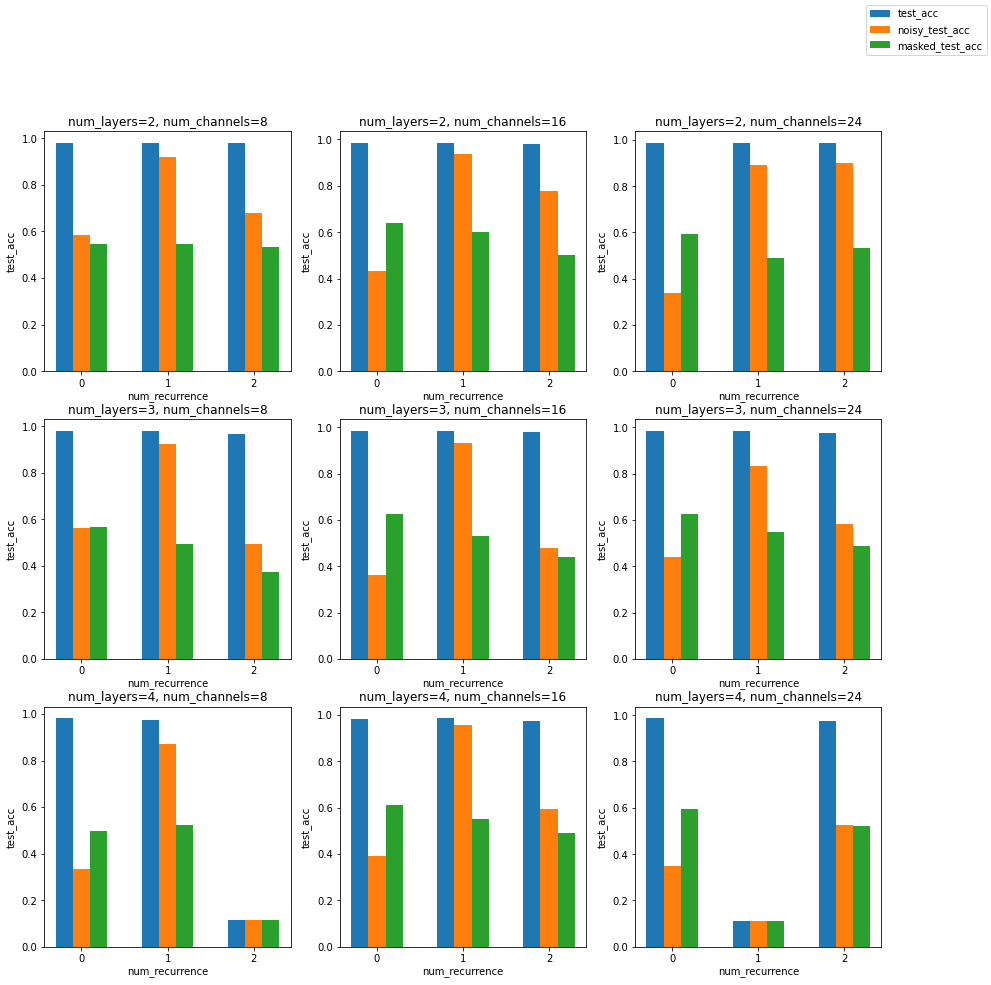

In [3]:
bar_width=0.2
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for num_layers in range(3):
    for num_channels in range(3):
        # print(f'num_layers={num_layers}, num_recurrence={num_recurrence}')
        ax = axes[num_layers, num_channels]
        ax.set_title(f'num_layers={num_layers + 2}, num_channels={num_channels * 8 + 8}')
        ax.set_xlabel('num_recurrence')
        ax.set_ylabel('test_acc')
        ax.bar(np.arange(3)-bar_width, combined['test_accs'][num_layers, :, num_channels], label='test_acc', width=bar_width)
        ax.bar(np.arange(3), combined['noisy_test_accs'][num_layers, :, num_channels], label='noisy_test_acc', width=bar_width)
        ax.bar(np.arange(3)+bar_width, combined['masked_test_accs'][num_layers, :, num_channels], label='masked_test_acc', width=bar_width)
        ax.set_xticks(np.arange(3))

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.savefig('accuracy.png')